## Sklearn pipeline - как я однажды разобрался с ним

Это была практическая работа по созданию пайплайна. Был блокнот с готовым рабочим кодом. И задача,похожая на ту, что в блокноте. Казалось бы, что тут такого - взять и перевести все на пайтон, глядя на готовый ноутбук. Ноя этого сделать не смог, промучавшись долгих 2 дня! Чего только я ни делал, но мой пайплайн не работал! Тогда я решил конкретно разобрать эту тему, что это за pipline, как они работают.

Изучить этот вопрос я решил вот на [этом](https://inria.github.io/scikit-learn-mooc/python_scripts/01_tabular_data_exploration.html) примере.


Мы будем использовать данные переписи населения США 1994 года, которые мы скачали с OpenML .

Вы можете посмотреть веб-страницу OpenML, чтобы узнать больше об этом наборе данных: http://www.openml.org/d/1590 .

Набор данных доступен в виде файла CSV (значения, разделенные запятыми), и мы будем использовать pandasего для чтения.

Хоть этот датасет оказался и не в формате csv, а в arff - это не страшно. Я его скачал в таком виде, потом залил на [этот](https://pulipulichen.github.io/jieba-js/weka/arff2csv/) сайт, конвертировал и скачал готовый датасет в csv.



#### Загрузка датасета

In [1]:
import pandas as pd

adult_census = pd.read_csv("data/csv_result-phpMawTba.csv")

Данные хранятся в pandasкадре данных. Фрейм данных — это тип структурированных данных, состоящий из двух измерений. Этот тип данных также называют табличными данными.

Каждая строка представляет собой «образец». В области машинного обучения или описательной статистики обычно используются эквивалентные термины «запись», «экземпляр» или «наблюдение».

Каждый столбец представляет тип собранной информации и называется «функцией». В области машинного обучения и описательной статистики обычно используются эквивалентные термины «переменная», «атрибут» или «ковариация».

Быстрый способ проверить фрейм данных — показать первые несколько строк с помощью headметода:

In [2]:
adult_census.head()

,id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,4,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,5,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Столбец с именем class является нашей целевой переменной (т. е. переменной, которую мы хотим предсказать). Возможны два класса: <=50K(низкий доход) и >50K(высокий доход). Получающаяся в результате проблема прогнозирования, таким образом, является проблемой бинарной классификации, поскольку classимеет только два возможных значения. Мы будем использовать оставшиеся столбцы (любой столбец, кроме class) в качестве входных переменных для нашей модели.

In [3]:
target_column = "class"
adult_census[target_column].value_counts()

<=50K    37155
>50K     11687
Name: class, dtype: int64

Примечание

Здесь классы немного несбалансированы, то есть имеется больше образцов одного или нескольких классов по сравнению с другими. В этом случае у нас гораздо больше образцов с , чем с . Дисбаланс классов часто возникает на практике и может потребовать специальных методов при построении прогностической модели." <=50K"" >50K"

Например, в медицинских учреждениях, если мы пытаемся предсказать, разовьется ли у субъектов редкое заболевание, в наборе данных будет намного больше здоровых субъектов, чем больных.

Набор данных содержит как числовые, так и категориальные данные. Числовые значения принимают непрерывные значения, например "age". Категориальные значения могут иметь конечное число значений, например "native-country".

In [4]:
numerical_columns = [
    "age",
    "education-num",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
]
categorical_columns = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country",
]
all_columns = numerical_columns + categorical_columns + [target_column]

adult_census = adult_census[all_columns]

Мы можем проверить количество выборок и количество столбцов, доступных в наборе данных:

In [5]:
print(
    f"The dataset contains {adult_census.shape[0]} samples and "
    f"{adult_census.shape[1]} columns"
)

The dataset contains 48842 samples and 14 columns


Мы можем вычислить количество функций, подсчитав количество столбцов и вычтя 1, поскольку один из столбцов является целевым.

In [6]:
print(f"The dataset contains {adult_census.shape[1] - 1} features.")

The dataset contains 13 features.


#### Визуальная проверка данных 

Перед построением прогностической модели рекомендуется просмотреть данные:

может быть, задача, которую вы пытаетесь решить, может быть решена без машинного обучения;

вам нужно проверить, что информация, необходимая для вашей задачи, действительно присутствует в наборе данных;

проверка данных — хороший способ найти особенности. Они могут возникнуть во время сбора данных (например, неисправный датчик или отсутствующие значения) или из-за того, как данные обрабатываются впоследствии (например, ограниченные значения).

Давайте посмотрим на распределение отдельных функций, чтобы получить некоторое представление о данных. Мы можем начать с построения гистограмм, обратите внимание, что это работает только для функций, содержащих числовые значения:

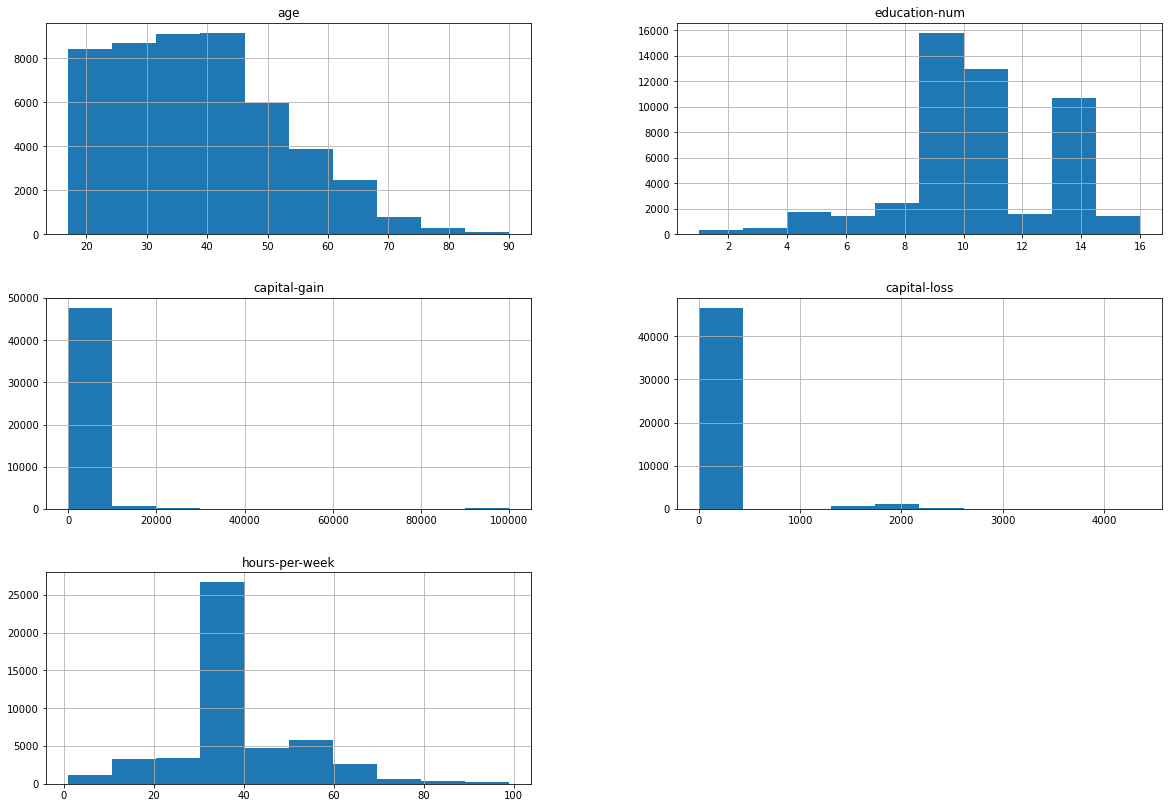

In [7]:
_ = adult_census.hist(figsize=(20, 14))

В предыдущей ячейке мы использовали следующий шаблон: . Мы делаем это, чтобы не показывать вывод, который в данном случае не очень полезен. На самом деле мы присваиваем вывод переменной (называемой подчеркиванием). По соглашению в Python переменная подчеркивания используется как «мусорная» переменная для хранения результатов, которые нас не интересуют._ = func()func()func()_

Мы уже можем сделать несколько комментариев по поводу некоторых переменных:

"age": для . В описании набора данных указано, что пенсионеры были отфильтрованы ( );age > 70hours-per-week > 0

"education-num": пик на 10 и 13, трудно сказать, чему он соответствует, не глядя дальше. Мы сделаем это позже в этой записной книжке;

"hours-per-week"достигает максимума в 40 часов, вполне вероятно, что это было стандартное количество рабочих часов на момент сбора данных;

большинство значений "capital-gain"и "capital-loss"близки к нулю.

Для категориальных переменных мы можем посмотреть на распределение значений:

In [8]:
adult_census["sex"].value_counts()

Male      32650
Female    16192
Name: sex, dtype: int64

Обратите внимание, что процесс сбора данных привел к важному дисбалансу между количеством выборок мужчин и женщин.

Имейте в виду, что обучение модели с таким дисбалансом данных может привести к непропорциональным ошибкам прогнозирования для недопредставленных групп. Это типичная причина проблем со справедливостью , если использовать ее наивно при развертывании системы, основанной на машинном обучении, в реальных условиях.

Мы рекомендуем нашим читателям обратиться к сайту [Fairlearn.org](https://fairlearn.org/) за ресурсами о том, как количественно оценить и потенциально смягчить проблемы справедливости, связанные с развертыванием автоматизированных систем принятия решений, основанных на компонентах машинного обучения.

Изучение того, почему процесс сбора данных в этом наборе данных привел к такому неожиданному гендерному дисбалансу, выходит за рамки этого МООК, но мы должны помнить, что этот набор данных не является репрезентативным для населения США, прежде чем делать какие-либо выводы на основе его статистики или прогнозов. обученных на нем моделей.

In [9]:
adult_census["education"].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

Как отмечалось выше, "education-num"распределение имеет два явных пика около 10 и 13 лет. Разумно было бы ожидать, что "education-num"это число лет обучения.

Рассмотрим связь между "education"и "education-num".

In [10]:
pd.crosstab(index=adult_census["education"], columns=adult_census["education-num"])

education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,1389,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1812,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,657,0,0,0,0,0,0,0,0
1st-4th,0,247,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,509,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,955,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,756,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1601,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,2061,0,0,0,0,0


Для каждой записи в \"education\", есть только одно единственное соответствующее значение в \"education-num\". Это показывает это "education"и "education-num" дает вам ту же информацию. Например, "education-num"=2эквивалентно "education"="1st-4th". На практике это означает, что мы можем удалять "education-num"без потери информации. Обратите внимание, что наличие избыточных (или сильно коррелированных) столбцов может быть проблемой для алгоритмов машинного обучения.

В будущих блокнотах мы сохраним только "education"переменную, исключив "education-num"переменную, поскольку последняя избыточна по отношению к первой.

Другой способ проверить данные — сделать pairplotи показать, как каждая переменная отличается в зависимости от нашей цели, "class"т.е. Графики по диагонали показывают распределение отдельных переменных для каждого "class". Графики вне диагонали могут выявить интересные взаимодействия между переменными.

Информация о том как поменять размер графиков - [здесь!](https://overcoder.net/q/293631/%D0%BA%D0%B0%D0%BA-%D0%B8%D0%B7%D0%BC%D0%B5%D0%BD%D0%B8%D1%82%D1%8C-%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%80-%D1%84%D0%B8%D0%B3%D1%83%D1%80%D1%8B-%D0%B2-%D0%BF%D0%B0%D0%BA%D0%B5%D1%82%D0%B5-python-seaborn)

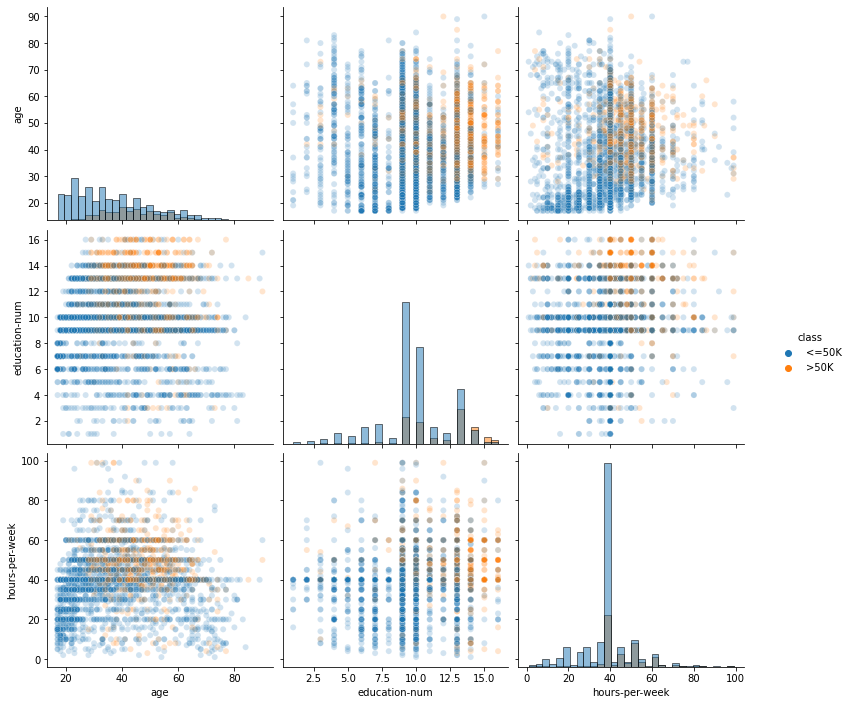

In [11]:
import seaborn as sns

# We will plot a subset of the data to keep the plot readable and make the
# plotting faster
n_samples_to_plot = 5000
columns = ["age", "education-num", "hours-per-week"]
_ = sns.pairplot(
    data=adult_census[:n_samples_to_plot],
    vars=columns,
    hue=target_column,
    plot_kws={"alpha": 0.2},
    height=3,
    diag_kind="hist",
    diag_kws={"bins": 30},
)
_.fig.set_size_inches(12,10)

#### Создание правил принятия решений вручную 
Глядя на предыдущие графики, мы могли бы создать некоторые рукописные правила, которые предсказывают, имеет ли кто-то высокий или низкий доход. Например, мы могли бы сосредоточиться на сочетании функций "hours-per-week"и "age". 

Информация о том, как менять размер графика - [здесь.](https://stackoverflow.com/questions/332289/how-do-i-change-the-size-of-figures-drawn-with-matplotlib)

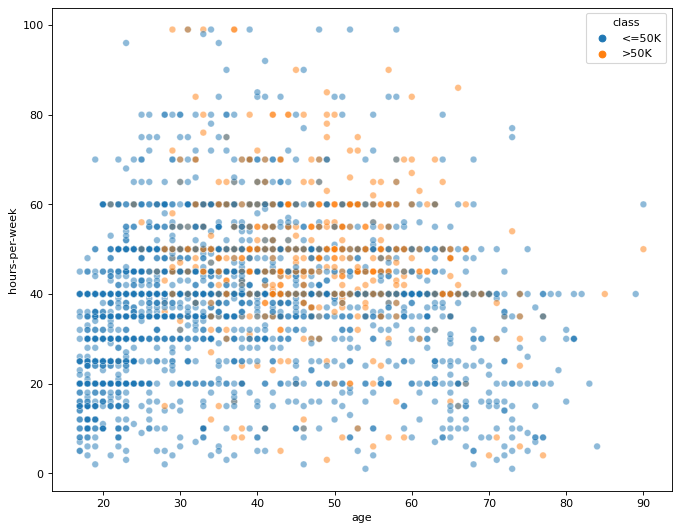

In [12]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=80)

_ = sns.scatterplot(
    x="age",
    y="hours-per-week",
    data=adult_census[:n_samples_to_plot],
    hue=target_column,
    alpha=0.5,
    
)


Точки данных (кружки) показывают распределение "hours-per-week"и "age"в наборе данных. Синие точки означают низкий доход, а оранжевые точки — высокий доход. Эта часть графика такая же, как нижний левый график на парном графике выше.

На этом графике мы можем попытаться найти области, которые в основном содержат один класс, чтобы мы могли легко решить, какой класс следует предсказать. Мы могли бы придумать написанные от руки правила, как показано на этом графике:

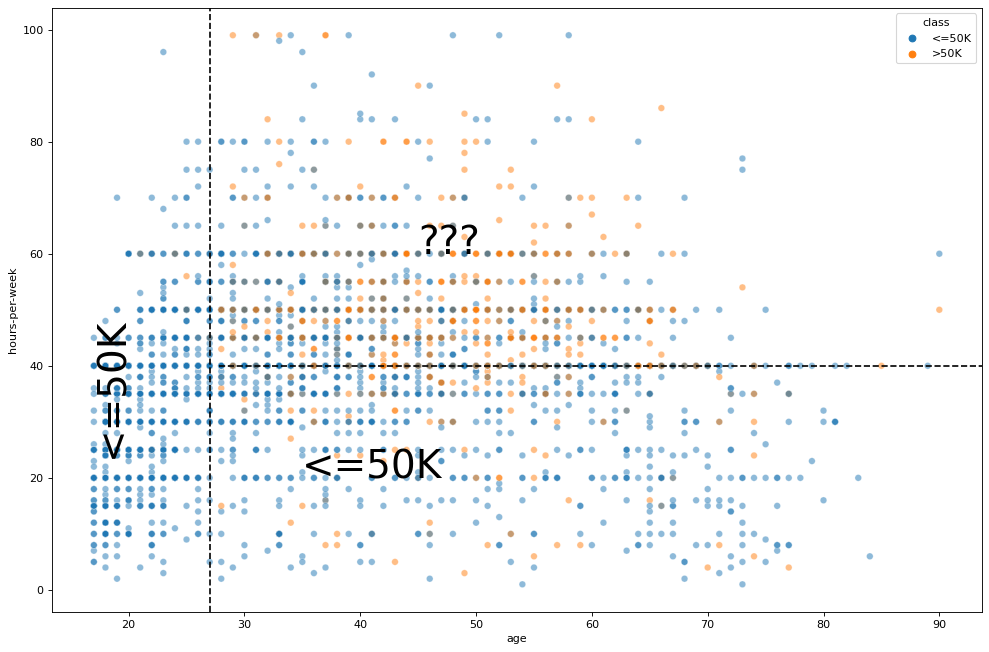

In [13]:
import matplotlib.pyplot as plt
figure(figsize=(15, 10), dpi=80)
ax = sns.scatterplot(
    x="age",
    y="hours-per-week",
    data=adult_census[:n_samples_to_plot],
    hue=target_column,
    alpha=0.5,
)

age_limit = 27
plt.axvline(x=age_limit, ymin=0, ymax=1, color="black", linestyle="--")

hours_per_week_limit = 40
plt.axhline(y=hours_per_week_limit, xmin=0.18, xmax=1, color="black", linestyle="--")

plt.annotate("<=50K", (17, 25), rotation=90, fontsize=35)
plt.annotate("<=50K", (35, 20), fontsize=35)
_ = plt.annotate("???", (45, 60), fontsize=35)

В регионе (левый регион) прогноз малодоходный. Действительно, синих точек много, а оранжевых точек мы не видим.age < 27

В регионе (нижний правый регион) прогноз низкий доход. Действительно, синих точек много, а оранжевых всего несколько.age > 27 AND hours-per-week < 40

В области (вверху справа) мы видим смесь синих и оранжевых точек. Кажется сложным выбрать, какой класс мы должны предсказать в этом регионе.age > 27 AND hours-per-week > 40

Интересно отметить, что некоторые модели машинного обучения будут работать так же, как и мы: они известны как модели дерева решений. Два пороговых значения, которые мы выбрали (27 лет и 40 часов), несколько произвольны, т. е. мы выбрали их, взглянув только на парный график. Напротив, дерево решений выбирает «лучшие» разбиения на основе данных без вмешательства или проверки со стороны человека. Деревья решений будут рассмотрены более подробно в следующем модуле.

Обратите внимание, что машинное обучение часто используется, когда создание правил вручную не является простым делом. Например, потому что мы находимся в большом измерении (много признаков в таблице) или потому что нет простых и очевидных правил, разделяющих два класса, как в верхней правой области предыдущего графика.

Подводя итог, важно помнить, что в условиях машинного обучения модель автоматически создает «правила» на основе существующих данных, чтобы делать прогнозы на основе новых невидимых данных.

#### Выводы:
В этом блокноте мы:

загрузил данные из файла CSV с помощью pandas;

рассмотрел различные типы переменных, чтобы различать категориальные и числовые переменные;

проверил данные с помощью pandasи seaborn. Проверка данных может позволить вам решить, подходит ли использование машинного обучения для ваших данных, и выявить потенциальные особенности ваших данных.

Мы сделали важные наблюдения (которые будут рассмотрены позже более подробно):

если ваша целевая переменная несбалансирована (например, у вас больше выборок из одной целевой категории, чем из другой), вам могут потребоваться специальные методы для обучения и оценки вашей модели машинного обучения;

наличие избыточных (или сильно коррелированных) столбцов может быть проблемой для некоторых алгоритмов машинного обучения;

в отличие от дерева решений, линейные модели могут фиксировать только линейные взаимодействия, поэтому помните о нелинейных отношениях в ваших данных.

#### Первая модель с scikit-learn 
В этой записной книжке мы покажем, как строить прогностические модели на табличных наборах данных, используя только числовые признаки.

В частности, мы выделим:

API scikit-learn : // ;.fit(X, y).predict(X).score(X, y)

как оценить эффективность обобщения модели с разделением поезд-тест.

Разделим данные и цель

In [14]:
target_name = "class"
target = adult_census[target_name]
target

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: class, Length: 48842, dtype: object

In [15]:
data = adult_census.drop(columns=[target_name, ])
data.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,25,7,0,0,40,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States
1,38,9,0,0,50,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
2,28,12,0,0,40,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
3,44,10,7688,0,40,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States
4,18,10,0,0,30,?,Some-college,Never-married,?,Own-child,White,Female,United-States


Теперь мы можем задержаться на переменных, также именуемых функциями, которые мы будем использовать для построения нашей прогностической модели. Кроме того, мы также можем проверить, сколько образцов доступно в нашем наборе данных.

In [16]:
data.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [17]:
print(f"The dataset contains {data.shape[0]} samples and "
      f"{data.shape[1]} features")

The dataset contains 48842 samples and 13 features


#### Соберем модель и сделаем прогноз 
Мы построим классификационную модель, используя стратегию «K ближайших соседей». Чтобы предсказать цель новой выборки, k ближайших соседей учитывает kближайшие выборки в обучающем наборе и предсказывает цель большинства этих выборок.

Здесь мы используем K-ближайших соседей. Однако имейте в виду, что это редко бывает полезным на практике. Мы используем его, потому что это интуитивно понятный алгоритм. В следующем блокноте мы представим лучшие модели.

Метод fitвызывается для обучения модели на входных (признаках) и целевых данных.

In [18]:
data.isna().sum()

age               0
education-num     0
capital-gain      0
capital-loss      0
hours-per-week    0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
dtype: int64

![](https://inria.github.io/scikit-learn-mooc/_images/api_diagram-predictor.fit.svg)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

model = RandomForestClassifier()
a = model.fit(data, target)

ValueError: could not convert string to float: 'Private'

#### Кодирование категориальных переменных

In [20]:
adult_census = adult_census.drop(columns="education-num")

target_name = "class"
target = adult_census[target_name]

data = adult_census.drop(columns=[target_name])

Определите категориальные переменные 
Как мы видели в предыдущем разделе, числовая переменная — это величина, представленная действительным или целым числом. Эти переменные могут естественным образом обрабатываться алгоритмами машинного обучения, которые обычно состоят из последовательности арифметических инструкций, таких как сложения и умножения.

Напротив, категориальные переменные имеют дискретные значения, обычно представленные строковыми метками (но не только), взятыми из конечного списка возможных вариантов. Например, переменная native-countryв нашем наборе данных является категориальной, потому что она кодирует данные, используя конечный список возможных стран (вместе с ?символом, когда эта информация отсутствует):

In [21]:
data["native-country"].value_counts().sort_index()

?                               857
Cambodia                         28
Canada                          182
China                           122
Columbia                         85
Cuba                            138
Dominican-Republic              103
Ecuador                          45
El-Salvador                     155
England                         127
France                           38
Germany                         206
Greece                           49
Guatemala                        88
Haiti                            75
Holand-Netherlands                1
Honduras                         20
Hong                             30
Hungary                          19
India                           151
Iran                             59
Ireland                          37
Italy                           105
Jamaica                         106
Japan                            92
Laos                             23
Mexico                          951
Nicaragua                   

Как мы можем легко распознать категориальные столбцы в наборе данных? Часть ответа заключается в типе данных столбцов:

In [22]:
data.dtypes

age                int64
capital-gain       int64
capital-loss       int64
hours-per-week     int64
workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
native-country    object
dtype: object

Если мы посмотрим на "native-country"столбец, мы увидим, что его тип данных — object, что означает, что он содержит строковые значения.

Выберите объекты на основе их типа данных 
В предыдущей записной книжке мы вручную определили числовые столбцы. Мы могли бы сделать аналогичный подход. Вместо этого мы будем использовать вспомогательную функцию scikit-learn make_column_selector, которая позволяет нам выбирать столбцы на основе их типа данных. Мы проиллюстрируем, как использовать этот помощник.

In [23]:
from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(data)
categorical_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

Здесь мы создали селектор, передав тип данных для включения; затем мы передали входной набор данных объекту-селектору, который вернул список имен столбцов с запрошенным типом данных. Теперь мы можем отфильтровать ненужные столбцы:

In [24]:
data_categorical = data[categorical_columns]
data_categorical.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States


In [25]:
print(f"The dataset is composed of {data_categorical.shape[1]} features")

The dataset is composed of 8 features


В оставшейся части этого раздела мы представим различные стратегии кодирования категориальных данных в числовые данные, которые могут использоваться алгоритмом машинного обучения.

#### Стратегии кодирования категорий 
Кодирование порядковых категорий 
Наиболее интуитивно понятная стратегия — кодировать каждую категорию своим номером. Данные OrdinalEncoderбудут преобразованы таким образом. Мы начнем с кодирования одного столбца, чтобы понять, как работает кодирование.

In [26]:
from sklearn.preprocessing import OrdinalEncoder

education_column = data_categorical[["education"]]

encoder = OrdinalEncoder()
education_encoded = encoder.fit_transform(education_column)
education_encoded

array([[ 1.],
       [11.],
       [ 7.],
       ...,
       [11.],
       [11.],
       [11.]])

Мы видим, что каждая категория в "education"была заменена числовым значением. Мы могли бы проверить сопоставление между категориями и числовыми значениями, проверив соответствующий атрибут categories_.

In [27]:
encoder.categories_

[array(['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th',
        'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad',
        'Masters', 'Preschool', 'Prof-school', 'Some-college'],
       dtype=object)]

Теперь мы можем проверить кодировку, примененную ко всем категориальным функциям.

In [28]:
data_encoded = encoder.fit_transform(data_categorical)
data_encoded[:5]

array([[ 4.,  1.,  4.,  7.,  3.,  2.,  1., 39.],
       [ 4., 11.,  2.,  5.,  0.,  4.,  1., 39.],
       [ 2.,  7.,  2., 11.,  0.,  4.,  1., 39.],
       [ 4., 15.,  2.,  7.,  0.,  2.,  1., 39.],
       [ 0., 15.,  4.,  0.,  3.,  4.,  0., 39.]])

In [29]:
print(
    f"The dataset encoded contains {data_encoded.shape[1]} features")

The dataset encoded contains 8 features


Мы видим, что категории были закодированы для каждой функции (столбца) независимо. Также отметим, что количество признаков до и после кодирования одинаково.

Однако будьте осторожны при применении этой стратегии кодирования: использование этого целочисленного представления приводит к тому, что последующие модели прогнозирования предполагают, что значения упорядочены (например, 0 < 1 < 2 < 3…).

По умолчанию OrdinalEncoderиспользует лексикографическую стратегию для сопоставления меток строковых категорий с целыми числами. Эта стратегия произвольна и часто бессмысленна. Например, предположим, что в наборе данных есть категориальная переменная "size"с такими категориями, как «S», «M», «L», «XL». Мы хотели бы, чтобы целочисленное представление учитывало значение размеров, сопоставляя их с возрастающими целыми числами, такими как . Однако лексикографическая стратегия, используемая по умолчанию, будет отображать метки «S», «M», «L», «XL» на 2, 1, 0, 3, следуя алфавитному порядку.0, 1, 2, 3

Класс OrdinalEncoderпринимает categoriesаргумент конструктора для явной передачи категорий в ожидаемом порядке. При необходимости вы можете найти дополнительную информацию в документации scikit-learn .

Если категориальная переменная не несет никакой значимой информации о порядке, то это кодирование может ввести в заблуждение последующие статистические модели, и вместо этого вы можете рассмотреть возможность использования одноразового кодирования (см. ниже).

Кодирование номинальных категорий (без указания порядка) 
OneHotEncoder— это альтернативный кодировщик, который не позволяет нижестоящим моделям делать ложные предположения об упорядочении категорий. Для данной функции будет создано столько новых столбцов, сколько существует возможных категорий. Для данного образца значение столбца, соответствующего категории, будет установлено на 1, а все столбцы других категорий будут установлены на 0.

Мы начнем с кодирования одной функции (например "education", ), чтобы проиллюстрировать, как работает кодирование.

In [30]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
education_encoded = encoder.fit_transform(education_column)
education_encoded

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

sparse=False используется в OneHotEncoderдидактических целях, а именно для облегчения визуализации данных.

Разреженные матрицы являются эффективными структурами данных, когда большинство ваших матричных элементов равны нулю. В этом курсе они подробно рассматриваться не будут. 
sparse=Falseиспользуется в OneHotEncoderдидактических целях, а именно для облегчения визуализации данных.

Мы видим, что кодирование одной функции даст массив NumPy, полный нулей и единиц. Мы можем получить лучшее понимание, используя связанные имена функций, полученные в результате преобразования.

In [31]:
feature_names = encoder.get_feature_names(input_features=["education"])
education_encoded = pd.DataFrame(education_encoded, columns=feature_names)
education_encoded

,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
48839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
48840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Как мы видим, каждая категория (уникальное значение) стала столбцом; кодировка возвращает для каждого образца 1, чтобы указать, к какой категории он принадлежит.

Давайте применим эту кодировку к полному набору данных.

In [32]:
print(
    f"The dataset is composed of {data_categorical.shape[1]} features")
data_categorical.head()

The dataset is composed of 8 features


,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States


In [33]:
data_encoded = encoder.fit_transform(data_categorical)
data_encoded[:5]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [34]:
print(
    f"The encoded dataset contains {data_encoded.shape[1]} features")

The encoded dataset contains 102 features


Давайте завернем этот массив NumPy в фрейм данных с информативными именами столбцов, предоставленными объектом кодировщика:

encoder.get_feature_names_out иногда надо писать так encoder.get_feature_names

In [35]:
columns_encoded = encoder.get_feature_names(data_categorical.columns)
pd.DataFrame(data_encoded, columns=columns_encoded).head()

,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Посмотрите, как "workclass"была закодирована переменная 3 первых записей, и сравните это с исходным строковым представлением.

Количество признаков после кодирования более чем в 10 раз больше, чем в исходных данных, поскольку некоторые переменные, такие как occupationи native-country, имеют множество возможных категорий.

#### Выбор стратегии кодирования 
Выбор стратегии кодирования будет зависеть от базовых моделей и типа категорий (т. е. порядковых или номинальных).

В общем OneHotEncoder, это стратегия кодирования, используемая, когда последующие модели являются линейными моделями , в то время как OrdinalEncoderэто часто является хорошей стратегией с древовидными моделями .

Использование OrdinalEncoderбудет выводить порядковые категории. Это означает, что в результирующих категориях существует порядок (например, ). Последствия нарушения этого предположения об упорядочении действительно зависят от последующих моделей. На линейные модели будут влиять неправильно упорядоченные категории, а на древовидные модели - нет.

0 < 1 < 2

Вы все еще можете использовать OrdinalEncoderс линейными моделями, но вы должны быть уверены, что:

исходные категории (до кодирования) имеют порядок;

закодированные категории следуют тому же порядку, что и исходные категории.

В следующем упражнении показано, что может произойти, если использовать модель OrdinalEncoder с вкладышем, а указанные выше условия не выполняются.

Однократное кодирование категориальных переменных с высокой кардинальностью может привести к неэффективности вычислений в древовидных моделях. Из-за этого не рекомендуется использовать OneHotEncoderв таких случаях, даже если исходные категории не имеют заданного порядка. Мы покажем это в последнем упражнении этой последовательности.

#### Оцените наш конвейер прогнозирования 
Теперь мы можем интегрировать этот кодировщик в конвейер машинного обучения, как мы это делали с числовыми данными: давайте обучим линейный классификатор на закодированных данных и проверим производительность обобщения этого конвейера машинного обучения с помощью перекрестной проверки.

Прежде чем мы создадим конвейер, мы должны задержаться на файле native-country. Вспомним немного статистики по этой колонке.

In [36]:
data["native-country"].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

Мы видим, что Holand-Netherlandsкатегория встречается редко. Это будет проблемой при кросс-валидации: если выборка попадет в тестовый набор при разбиении, то классификатор не увидит категорию при обучении и не сможет ее закодировать.

В scikit-learn есть два решения, позволяющих обойти эту проблему:

перечислить все возможные категории и передать кодировщику через аргумент ключевого слова categories;

используйте параметр handle_unknown, т. е. если во время преобразования встречается неизвестная категория, результирующие столбцы с горячим кодированием для этой функции будут содержать все нули.

Здесь мы будем использовать последнее решение для простоты.

Имейте в виду , что OrdinalEncoderвыставляет также параметр handle_unknown. Его можно установить на use_encoded_value. Если выбран этот параметр, вы можете определить фиксированное значение, которое будет установлено для всех неизвестных во время transform. Например, установит все значения, встречающиеся во время вызова , которые не являются частью данных, обнаруженных во время вызова. Вы собираетесь использовать эти параметры в следующем упражнении.OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=42)transform42fit

Теперь мы можем создать наш конвейер машинного обучения.

#### Оцените наш конвейер прогнозирования 
Теперь мы можем интегрировать этот кодировщик в конвейер машинного обучения, как мы это делали с числовыми данными: давайте обучим линейный классификатор на закодированных данных и проверим производительность обобщения этого конвейера машинного обучения с помощью перекрестной проверки.

Прежде чем мы создадим конвейер, мы должны задержаться на файле native-country. Вспомним немного статистики по этой колонке.

In [37]:
data["native-country"].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

Мы видим, что Holand-Netherlandsкатегория встречается редко. Это будет проблемой при кросс-валидации: если выборка попадет в тестовый набор при разбиении, то классификатор не увидит категорию при обучении и не сможет ее закодировать.

В scikit-learn есть два решения, позволяющих обойти эту проблему:

перечислить все возможные категории и передать кодировщику через аргумент ключевого слова categories;

используйте параметр handle_unknown, т. е. если во время преобразования встречается неизвестная категория, результирующие столбцы с горячим кодированием для этой функции будут содержать все нули.

Здесь мы будем использовать последнее решение для простоты.

Имейте в виду , что OrdinalEncoderвыставляет также параметр handle_unknown. Его можно установить на use_encoded_value. Если выбран этот параметр, вы можете определить фиксированное значение, которое будет установлено для всех неизвестных во время transform. Например, установит все значения, встречающиеся во время вызова , которые не являются частью данных, обнаруженных во время вызова. Вы собираетесь использовать эти параметры в следующем упражнении.OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=42)transform42fit

Теперь мы можем создать наш конвейер машинного обучения.

In [38]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

model = make_pipeline(
    OneHotEncoder(handle_unknown="ignore"), LogisticRegression(max_iter=500)
)

Здесь нам нужно увеличить максимальное количество итераций, чтобы получить полностью сходящийся LogisticRegressionи замолчать a ConvergenceWarning. В отличие от числовых признаков, все категориальные признаки с горячим кодированием имеют одинаковую шкалу (значения равны 0 или 1), поэтому они не выиграют от масштабирования. В этом случае увеличение max_iterявляется правильным решением.

Наконец, мы можем проверить эффективность обобщения модели только с помощью категориальных столбцов.

In [39]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(model, data_categorical, target)
cv_results

{'fit_time': array([0.61024213, 0.60676503, 0.69499016, 0.63013339, 0.58269262]),
 'score_time': array([0.01988673, 0.02530694, 0.02159405, 0.02821732, 0.02530003]),
 'test_score': array([0.83222438, 0.83560242, 0.82872645, 0.83312858, 0.83466421])}

In [41]:
scores = cv_results["test_score"]
print(f"The accuracy is: {scores.mean():.3f} ± {scores.std():.3f}")

The accuracy is: 0.833 ± 0.002


Как вы можете видеть, такое представление категориальных переменных немного лучше предсказывает доход, чем числовые переменные, которые мы использовали ранее.

#### Использование числовых и категориальных переменных вместе 
В предыдущих блокнотах мы показали необходимую предварительную обработку для применения при работе с числовыми и категориальными переменными. Однако мы разделили процесс, чтобы рассматривать каждый тип отдельно. В этой записной книжке мы покажем, как объединить эти шаги предварительной обработки.

Сначала мы загрузим весь набор данных переписи взрослого населения.

In [45]:
target_name = "class"
target = adult_census[target_name]

data = adult_census.drop(columns=[target_name])

#### Выбор на основе типов данных 
Мы разделим категориальные и числовые переменные, используя их типы данных для их идентификации, как мы видели ранее, что objectсоответствует категориальным столбцам (строкам). Мы используем make_column_selector помощник для выбора соответствующих столбцов.

In [46]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)

Здесь мы знаем, что object тип данных используется для представления строк и, следовательно, категориальных функций. Имейте в виду, что это не всегда так. Иногда objectтип данных может содержать другие типы информации, такие как даты, которые не были должным образом отформатированы (строки), но все же относятся к количеству прошедшего времени.

В более общем сценарии вы должны вручную изучить содержимое вашего фрейма данных, чтобы не использовать его неправильно make_column_selector.

#### Отправка столбцов на конкретный процессор 
В предыдущих разделах мы видели, что нам нужно по-разному обрабатывать данные в зависимости от их характера (то есть числового или категориального).

Scikit-learn предоставляет ColumnTransformerкласс, который будет отправлять определенные столбцы в конкретный преобразователь, что позволяет легко подогнать единую прогностическую модель к набору данных, который объединяет оба типа переменных вместе (гетерогенно типизированные табличные данные).

Сначала мы определяем столбцы в зависимости от их типа данных:

однократное кодирование будет применяться к категориальным столбцам. Кроме того, мы используем handle_unknown="ignore"для решения потенциальных проблем из-за редких категорий.

численное масштабирование числовых характеристик, которые будут стандартизированы.

Теперь мы создаем наш ColumnTransfomer, указав три значения: имя препроцессора, преобразователь и столбцы. Во-первых, давайте создадим препроцессоры для числовой и категориальной частей.

In [47]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

Теперь мы создаем преобразователь и связываем каждый из этих препроцессоров с соответствующими столбцами.

In [48]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])

Мы можем потратить минуту, чтобы графически представить структуру a ColumnTransformer:

![](https://inria.github.io/scikit-learn-mooc/_images/api_diagram-columntransformer.svg)

А ColumnTransformerделает следующее:

Он разбивает столбцы исходного набора данных на основе предоставленных имен столбцов или индексов. Мы получим столько подмножеств, сколько трансформаторов передано в ColumnTransformer.

Он преобразует каждое подмножество . К каждому подмножеству применяется определенный преобразователь: он будет внутренне вызывать fit_transform bили transform. Результатом этого шага является набор преобразованных наборов данных.

Затем он объединяет преобразованные наборы данных в один набор данных.

Важно то, что ColumnTransformerэто похоже на любой другой преобразователь scikit-learn. В частности, его можно комбинировать с классификатором в Pipeline:

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week'])])),
                ('logisticregression', LogisticRegression(max_iter=500))])

Окончательная модель более сложна, чем предыдущие модели, но по-прежнему использует тот же API (тот же набор методов, которые может вызывать пользователь):

fitвызывается метод для предварительной обработки данных и последующего обучения классификатора предварительно обработанных данных ;

метод predictделает прогнозы по новым данным;

этот scoreметод используется для прогнозирования тестовых данных и сравнения прогнозов с ожидаемыми тестовыми метками для вычисления точности.

Давайте начнем с разделения наших данных на обучающие и тестовые наборы.

In [50]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=42)

Имейте в виду, что мы используем train_test_splitздесь в дидактических целях, чтобы показать scikit-learn API. В реальных условиях можно было бы предпочесть использовать перекрестную проверку, чтобы также иметь возможность оценить неопределенность нашей оценки эффективности обобщения модели, как показано ранее.

In [51]:
_ = model.fit(data_train, target_train)

Затем мы можем отправить необработанный набор данных прямо в конвейер. Действительно, нам не нужно выполнять какую-либо ручную предварительную обработку (вызов методов transformили fit_transform), так как она будет обработана при вызове predict метода. В качестве примера мы прогнозируем пять первых выборок из тестового набора.

In [52]:
data_test.head()

,age,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country
7762,56,0,0,40,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,United-States
23881,25,0,0,40,Private,HS-grad,Married-civ-spouse,Transport-moving,Own-child,Other,Male,United-States
30507,43,14344,0,40,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,United-States
28911,32,0,0,40,Private,HS-grad,Married-civ-spouse,Transport-moving,Husband,White,Male,United-States
19484,39,0,0,30,Private,Bachelors,Married-civ-spouse,Sales,Wife,White,Female,United-States


In [53]:
model.predict(data_test)[:5]

array(['<=50K', '<=50K', '>50K', '<=50K', '>50K'], dtype=object)

In [54]:
target_test[:5]

7762     <=50K
23881    <=50K
30507     >50K
28911    <=50K
19484    <=50K
Name: class, dtype: object

In [55]:
model.score(data_test, target_test)

0.8576693145524527

#### Оценка модели с перекрестной проверкой 
Как указывалось ранее, прогностическая модель должна оцениваться перекрестной проверкой. Наша модель может использоваться с инструментами перекрестной проверки scikit-learn, как и любые другие предикторы:

In [56]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(model, data, target, cv=5)
cv_results

{'fit_time': array([0.77911687, 0.80706525, 0.74112201, 0.75227737, 0.77023101]),
 'score_time': array([0.02773523, 0.0251472 , 0.02370954, 0.02451348, 0.03025246]),
 'test_score': array([0.8512642 , 0.8498311 , 0.84756347, 0.85247748, 0.85524161])}

In [57]:
scores = cv_results["test_score"]
print("The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} ± {scores.std():.3f}")

The mean cross-validation accuracy is: 0.851 ± 0.003


Составная модель имеет более высокую прогностическую точность, чем две модели, которые использовали числовые и категориальные переменные по отдельности.

#### Установка более мощной модели 
Линейные модели хороши тем, что они обычно дешевы в обучении, малы в развертывании, быстро предсказуемы и дают хороший базовый уровень .

Однако часто бывает полезно проверить, могут ли более сложные модели, такие как ансамбль деревьев решений, привести к более высокой эффективности прогнозирования. В этом разделе мы будем использовать такую ​​модель, называемую деревьями повышения градиента, и оценим эффективность ее обобщения. Точнее, модель scikit-learn, которую мы будем использовать, называется HistGradientBoostingClassifier. Обратите внимание, что повышение моделей будет рассмотрено более подробно в следующем модуле.

Для древовидных моделей обработка числовых и категориальных переменных проще, чем для линейных моделей:

нам не нужно масштабировать числовые признаки

использование порядкового кодирования для категориальных переменных допустимо, даже если кодирование приводит к произвольному порядку

Следовательно, для HistGradientBoostingClassifier, конвейер предварительной обработки немного проще, чем тот, который мы видели ранее для LogisticRegression:

Иногда при выполнении 

from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.preprocessing import OrdinalEncoder

бывает ошибка, которую [решаем так:](https://github.com/scikit-learn/scikit-learn/issues/15079)

from sklearn.experimental import enable_hist_gradient_boosting

from sklearn.ensemble import HistGradientBoostingRegressor

from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.preprocessing import OrdinalEncoder


In [60]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.preprocessing import OrdinalEncoder

categorical_preprocessor = OrdinalEncoder(handle_unknown="use_encoded_value",
                                          unknown_value=-1)

preprocessor = ColumnTransformer([
    ('categorical', categorical_preprocessor, categorical_columns)],
    remainder="passthrough")

model = make_pipeline(preprocessor, HistGradientBoostingClassifier())

Теперь, когда мы создали нашу модель, мы можем проверить ее эффективность обобщения.

In [61]:
%%time
_ = model.fit(data_train, target_train)

Wall time: 711 ms


In [62]:
model.score(data_test, target_test)

0.8795348456309885

Мы можем заметить, что мы получаем значительно более высокую точность с моделью Gradient Boosting. Это часто то, что мы наблюдаем, когда набор данных имеет большое количество выборок и ограниченное количество информативных признаков (например, менее 1000) с сочетанием числовых и категориальных переменных.

Это объясняет, почему Gradient Boosted Machines очень популярны среди специалистов по обработке и анализу данных, которые работают с табличными данными.

В этом блокноте мы:

используется ColumnTransformerдля применения различной предварительной обработки для категориальных и числовых переменных;

использовал конвейер для объединения ColumnTransformerпредварительной обработки и подбора логистической регрессии;

увидел, что методы повышения градиента могут превзойти линейные модели .

#### Упражнение М1.05 
Цель этого упражнения — оценить влияние предварительной обработки признаков на конвейер, использующий классификатор на основе дерева решений вместо логистической регрессии.

Первый вопрос заключается в том, чтобы эмпирически оценить, полезно ли масштабирование числовых признаков;

Второй вопрос состоит в том, чтобы оценить, лучше ли эмпирически (как с вычислительной, так и со статистической точки зрения) использовать категории с целочисленным кодированием или с однократным кодированием.

In [82]:
adult_census = pd.read_csv("data/csv_result-phpMawTba.csv")
target_name = "class"
target = adult_census[target_name]
data = adult_census.drop(columns=[target_name, "education-num"])

Как и в предыдущих блокнотах, используем утилиту make_column_selector для выбора только столбцов с определенным типом данных. 

Кроме того, мы заранее перечисляем все категории для категориальных столбцов.

In [83]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)
numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)

In [84]:
data

,id,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,1,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,2,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,3,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,4,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,5,18,?,103497,Some-college,Never-married,?,Own-child,White,Female,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,48838,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
48838,48839,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
48839,48840,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
48840,48841,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [90]:
numerical_columns

['id', 'age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']

In [91]:
categorical_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

#### Эталонный конвейер (без числового масштабирования и категорий с целочисленным кодированием) 

Сначала давайте настроим конвейер, который мы использовали в основной записной книжке, в качестве эталона:

In [93]:
import time

from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import HistGradientBoostingClassifier

categorical_preprocessor = OrdinalEncoder(handle_unknown="use_encoded_value",
                                          unknown_value=-1)
preprocessor = ColumnTransformer([
    ('categorical', categorical_preprocessor, categorical_columns)],
    remainder="passthrough")

model = make_pipeline(preprocessor, HistGradientBoostingClassifier())

start = time.time()
cv_results = cross_validate(model, data, target)
elapsed_time = time.time() - start

scores = cv_results["test_score"]

print("The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} ± {scores.std():.3f} "
      f"with a fitting time of {elapsed_time:.3f}")

The mean cross-validation accuracy is: 0.851 ± 0.028 with a fitting time of 4.034


#### Масштабирование числовых признаков 
Давайте напишем аналогичный конвейер, который также масштабирует числовые признаки, используя StandardScaler(или аналогичный):

In [94]:
# solution
import time

from sklearn.preprocessing import StandardScaler

preprocessor = ColumnTransformer([
    ('numerical', StandardScaler(), numerical_columns),
    ('categorical', OrdinalEncoder(handle_unknown="use_encoded_value",
                                   unknown_value=-1),
     categorical_columns)])

model = make_pipeline(preprocessor, HistGradientBoostingClassifier())

start = time.time()
cv_results = cross_validate(model, data, target)
elapsed_time = time.time() - start

scores = cv_results["test_score"]

print("The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} ± {scores.std():.3f} "
      f"with a fitting time of {elapsed_time:.3f}")

The mean cross-validation accuracy is: 0.849 ± 0.030 with a fitting time of 4.095


Анализ

Мы можем заметить, что и точность, и время обучения примерно такие же, как у эталонного конвейера (любая разница во времени, которую вы можете наблюдать, незначительна).

Масштабирование числовых признаков действительно бесполезно для большинства моделей дерева решений вообще и для HistGradientBoostingClassifierв частности.

#### Горячее кодирование категориальных переменных 
Мы заметили, что целочисленное кодирование категориальных переменных может быть очень вредным для линейных моделей. Однако, похоже, это не относится к HistGradientBoostingClassifierмоделям, так как показатель перекрестной проверки эталонного конвейера OrdinalEncoder достаточно хорош.

Давайте посмотрим, сможем ли мы получить еще большую точность с помощью OneHotEncoder.

Подсказка: HistGradientBoostingClassifierпока не поддерживает разреженные входные данные. Возможно, вы захотите использовать для принудительного использования плотного представления в качестве обходного пути. OneHotEncoder(handle_unknown="ignore", sparse=False)

In [95]:
# solution
import time

from sklearn.preprocessing import OneHotEncoder

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore", sparse=False)
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns)],
    remainder="passthrough")

model = make_pipeline(preprocessor, HistGradientBoostingClassifier())

start = time.time()
cv_results = cross_validate(model, data, target)
elapsed_time = time.time() - start

scores = cv_results["test_score"]

print("The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} ± {scores.std():.3f} "
      f"with a fitting time of {elapsed_time:.3f}")

The mean cross-validation accuracy is: 0.847 ± 0.034 with a fitting time of 10.176


Анализ 

С точки зрения точности результат почти такой же. Причина в том, что HistGradientBoostingClassifierон достаточно выразительный и надежный, чтобы иметь дело с вводящим в заблуждение упорядочением категорий с целочисленным кодированием (чего не было в случае с линейными моделями).

Однако с вычислительной точки зрения время обучения намного больше: это вызвано тем, что OneHotEncoder генерирует примерно в 10 раз больше признаков, чем OrdinalEncoder.

Обратите внимание, что текущая реализация HistGradientBoostingClassifier все еще не завершена, и после правильной обработки разреженного представления время обучения может улучшиться с такими типами кодирования.

Главный вывод заключается в том, что произвольное целочисленное кодирование категорий прекрасно подходит HistGradientBoostingClassifier и обеспечивает быстрое время обучения.

[Какой энкодер мне использовать?](https://inria.github.io/scikit-learn-mooc/python_scripts/03_categorical_pipeline_sol_02.html)

OrdinalEncoder: может быть вредным для линейных моделей, если ваша категория не имеет значимого порядка, и вы убедитесь, что OrdinalEncoderон соблюдает этот порядок. Деревья могут справиться с OrdinalEncoderэтим хорошо, если они достаточно глубоки.

#### Визуализация конвейеров scikit-learn в Jupyter 

Цель ведения этой записной книжки состоит в том, чтобы:

сделать его доступным для пользователей, которые хотят воспроизвести его локально

заархивируйте сценарий на случай, если мы захотим перезаписать это видео с обновлением пользовательского интерфейса scikit-learn в будущем выпуске.

Сначала мы загружаем набор данных 
Нам нужно определить наши данные и цель. В этом случае мы построим классификационную модель

In [99]:
from sklearn import set_config
set_config(display='diagram')
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country'])])),
                ('histgradientboostingclassifier',
                 HistGradientBoostingClassifier())])

#### Еще одна визуализация на примере датасета house_prices.csv

Сначала мы загружаем набор данных 
Нам нужно определить наши данные и цель. В этом случае мы построим классификационную модель

In [109]:
import pandas as pd
ames_housing = pd.read_csv("data/house_prices.csv", na_values='?')

target_name = "SalePrice"
data, target = ames_housing.drop(columns=target_name), ames_housing[target_name]
target = (target > 200_000).astype(int)

Проверяем первые строки фрейма данных

In [110]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


Для простоты мы можем выбрать некоторые функции и сохранить только это произвольное подмножество данных:

In [111]:
numeric_features = ['LotArea', 'FullBath', 'HalfBath']
categorical_features = ['Neighborhood', 'HouseStyle']
data = data[numeric_features + categorical_features]

Затем мы создаем конвейер 
Первым шагом является определение шагов предварительной обработки.

In [112]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler(),
)])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

Следующим шагом является применение преобразований с помощьюColumnTransformer

In [113]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features),
])

Затем мы определяем модель и присоединяемся к шагам по порядку.

In [114]:
from sklearn.linear_model import LogisticRegression

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression()),
])

Давайте визуализируем это!

In [115]:
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['LotArea', 'FullBath',
                                                   'HalfBath']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Neighborhood',
                                                   'HouseStyle'])])),
                ('classifier', LogisticRegression())])